Normalization Test Results:

Parameter Set 1: [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]
  g_s(X): 1.000000
  h_s(Y): 1.000000
  g_b(X): 1.000000
  h_b(Y): 1.000000
  f(X, Y): 1.000000

Parameter Set 2: [2.9, 0.31, 1.1, 1.5, 0.4, 0.1, 2.6, 0.7]
  g_s(X): 1.000000
  h_s(Y): 1.000000
  g_b(X): 1.000000
  h_b(Y): 1.000000
  f(X, Y): 1.000000

Generating distribution plots for params_true...


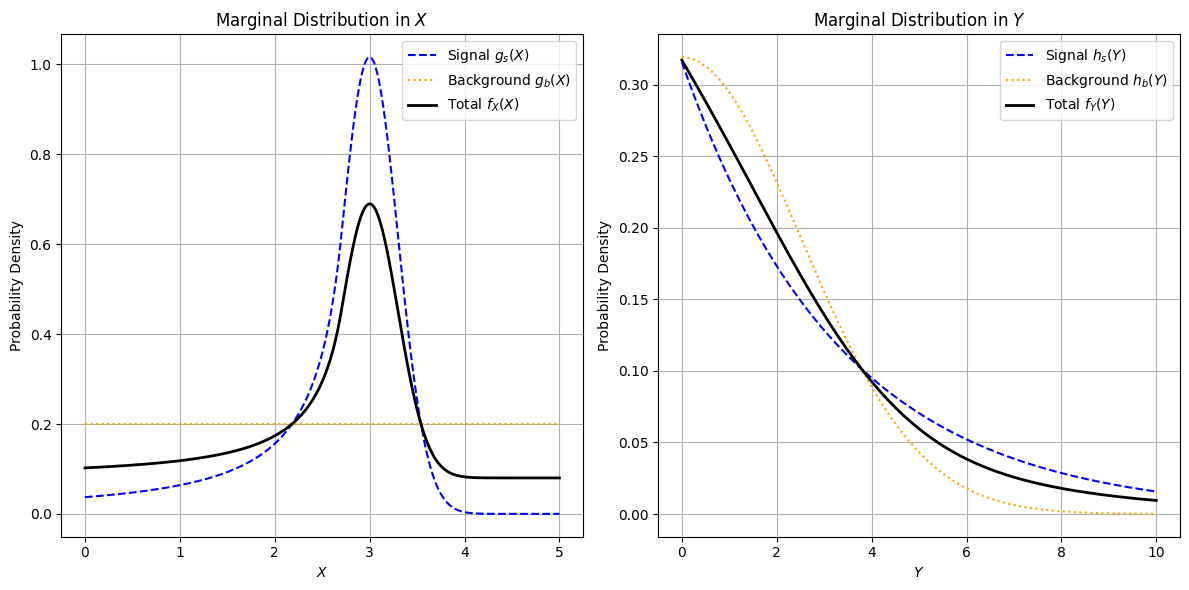

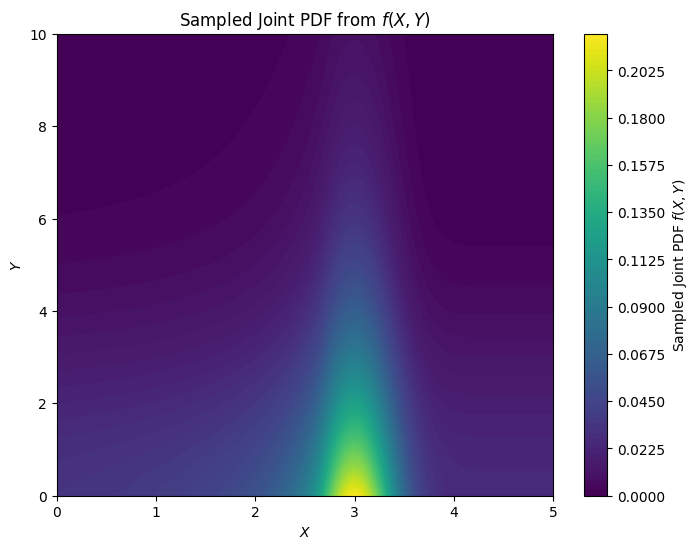


Generating sampled distribution plots...


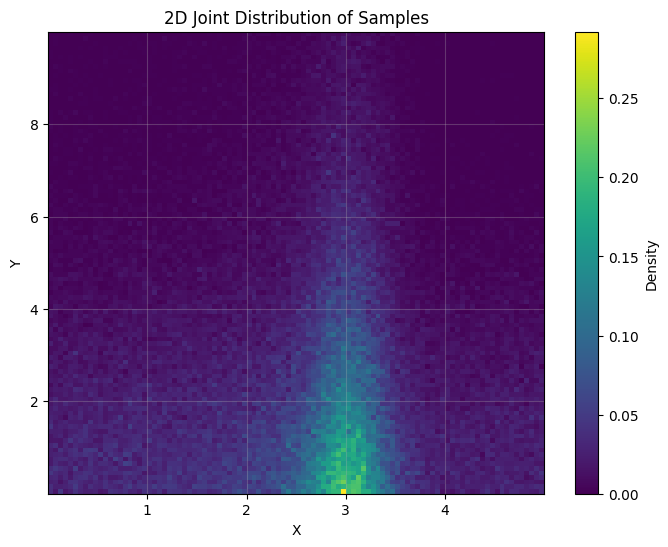

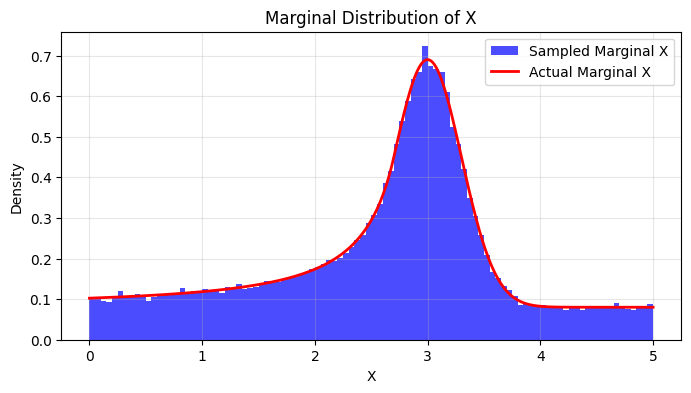

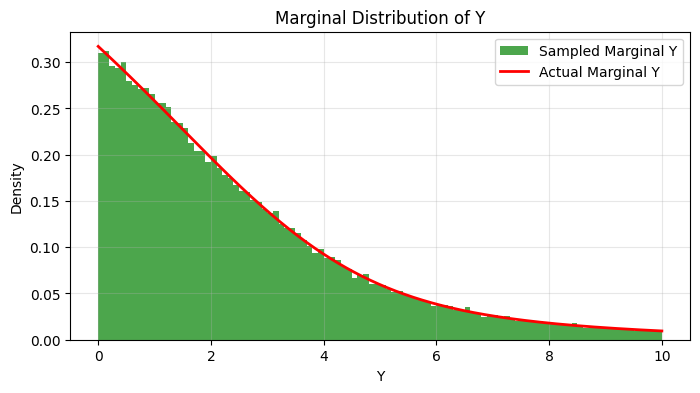


Fitting sampled data and generating surface comparison...


In [ ]:
from plots_utils import *
from distributions_sampling_Copy2 import *
import numpy as np

# Parameters for testing
params_true = [3, 0.3, 1, 1.4, 0.3, 0, 2.5, 0.6]
params_normalization = [params_true,
                        [2.9, 0.31, 1.1, 1.5, 0.4, 0.1, 2.6, 0.7]]  # List of parameter sets for normalization

# Corrected bounds definition
bounds = {
    "mu": (2.8, 3.2),
    "sigma": (0.05, 0.5),
    "beta": (0.5, 1.5),
    "m": (1.0, 2.0),
    "lambda_s": (0.1, 1.0),
    "mu_b": (-1, 1),
    "sigma_b": (2.0, 4.0),
    "f_signal": (0.1, 0.9),
    "N_expected": (0.95 * 100000, 1.05 * 100000)
}

# Parameter labels for the correlation matrix
param_labels = ["mu", "sigma", "beta", "m", "lambda_s", "mu_b", "sigma_b", "f_signal", "mu_total"]

# Step 1: Test normalization for each parameter set
print("Normalization Test Results:")
for i, params in enumerate(params_normalization):
    results = test_normalization(params, 10000)  # Call the test_normalization function for each parameter set
    print(f"\nParameter Set {i + 1}: {params}")
    for dist, value in results.items():
        print(f"  {dist}: {value:.6f}")

# Step 2: Plot distributions for params_true
print("\nGenerating distribution plots for params_true...")
plot_distributions(params_true)

x_samples, y_samples = sample_componentwise(100000, params_true)

# Step 4: Plot sampled distributions
print("\nGenerating sampled distribution plots...")
plot_sampled_distributions(x_samples, y_samples, params_true)
# Define initial guesses and bounds for the fit
initial_guess = {
    "mu": 3.0,
    "sigma": 0.3,
    "beta": 1.0,
    "m": 1.4,
    "lambda_s": 0.3,
    "mu_b": 0.0,
    "sigma_b": 2.5,
    "f_signal": 0.6,
    "N_expected": 100000
}

# Perform the fit and retrieve Minuit object
fit_result, m = perform_fit(x_samples, y_samples, bounds, initial_guess, return_minuit=True)

if fit_result["converged"]:
    print("\nFit successful! Fitted parameters:")
    for param, value in fit_result["parameters"].items():
        print(f"  {param}: {value:.4f}")
    
    # Display Minuit diagnostics
    print("\nMinuit Fit Diagnostics:")
    print(m)

else:
    print("\nFit failed. Cannot generate surface comparison or diagnostics.")
